<a href="https://colab.research.google.com/github/KFerreira1221/MachineLearning/blob/main/BinaryProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/binaryset/sample_submission.csv
/kaggle/input/binaryset/train.csv
/kaggle/input/binaryset/test.csv


In [ ]:
# Import libraries and load the datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.impute import SimpleImputer
import warnings

warnings.filterwarnings("ignore")

train = pd.read_csv('/kaggle/input/binaryset/train.csv')
test = pd.read_csv('/kaggle/input/binaryset/test.csv')

print(train.head())

   id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   0    Male   21                1         35.0                   0   
1   1    Male   43                1         28.0                   0   
2   2  Female   25                1         14.0                   1   
3   3  Female   35                1          1.0                   0   
4   4  Female   36                1         15.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0    1-2 Year            Yes         65101.0                 124.0      187   
1   > 2 Years            Yes         58911.0                  26.0      288   
2    < 1 Year             No         38043.0                 152.0      254   
3    1-2 Year            Yes          2630.0                 156.0       76   
4    1-2 Year             No         31951.0                 152.0      294   

   Response  
0         0  
1         1  
2         0  
3         0  
4         0  


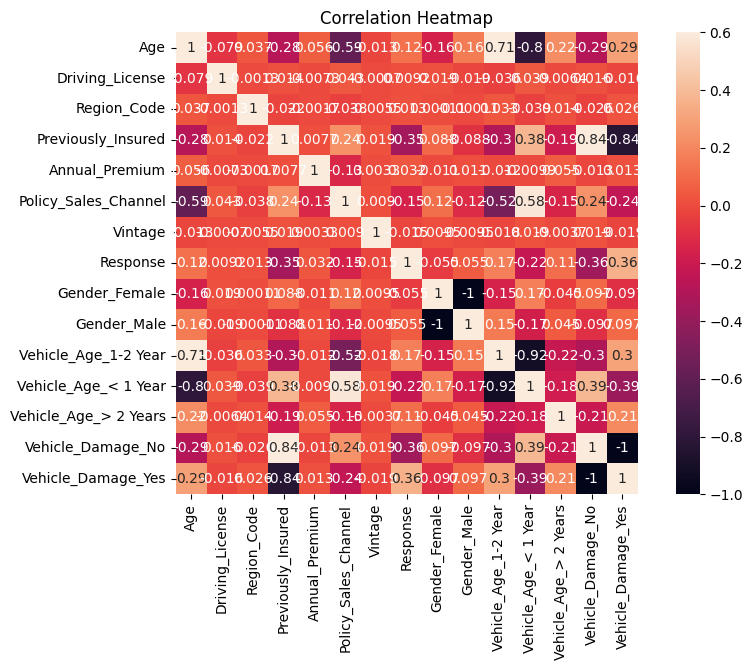

In [ ]:
# Create a correlation heatmap
train_encoded = pd.get_dummies(train, columns=['Gender', 'Vehicle_Age', 'Vehicle_Damage'])
numeric_df = train_encoded.drop(columns=['id'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), vmax=0.6, square=True, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Fill in the Null values of the Gender column with the most common letter and one-hot code the column
train_test_data = [train, test]
train.Gender.value_counts()
for dataset in train_test_data:
    dataset['Gender'] = dataset['Gender'].fillna('Male')
for dataset in train_test_data:
    dataset['Gender'] = dataset['Gender'].map( {'Male': 0, 'Female': 1} ).astype(int)
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,0,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,0,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,1,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,1,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,1,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [ ]:
# Fill in the Null values of the Age column with the median value and create a new column called AgeGroup that divides ages into groups
median_age = train['Age'].median()
train['Age'].fillna(median_age, inplace=True)
age_bins = [0, 12, 18, 25, 35, 45, 55, 65, 75, 85, 95]
age_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train['AgeGroup'] = pd.cut(train['Age'], bins=age_bins, labels=age_labels, right=False)
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,AgeGroup
0,0,0,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0,3
1,1,0,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1,5
2,2,1,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0,4
3,3,1,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0,5
4,4,1,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0,5


In [ ]:
# Fill in the Null values of the Driving_License column with the most common value
for dataset in train_test_data:
    dataset['Driving_License'] = dataset['Driving_License'].fillna('1')
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,AgeGroup
0,0,0,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0,3
1,1,0,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1,5
2,2,1,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0,4
3,3,1,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0,5
4,4,1,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0,5


In [ ]:
# Fill in the Null values of the Previously_Insured column with the most common value
for dataset in train_test_data:
    dataset['Previously_Insured'] = dataset['Previously_Insured'].fillna('0')
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,AgeGroup
0,0,0,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0,3
1,1,0,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1,5
2,2,1,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0,4
3,3,1,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0,5
4,4,1,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0,5


In [ ]:
# Fill in the Null values of the Vehicle_Damage column with the most common value
for dataset in train_test_data:
    dataset['Vehicle_Damage'] = dataset['Vehicle_Damage'].fillna('Yes')
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,AgeGroup
0,0,0,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0,3
1,1,0,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1,5
2,2,1,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0,4
3,3,1,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0,5
4,4,1,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0,5


In [ ]:
# Fill in the Null values of the Vehicle_Age column with the most common value
for dataset in train_test_data:
    dataset['Vehicle_Age'] = dataset['Vehicle_Age'].fillna('1-2 Year')
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,AgeGroup
0,0,0,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0,3
1,1,0,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1,5
2,2,1,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0,4
3,3,1,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0,5
4,4,1,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0,5


In [ ]:
# Drop the columns that will not be used
train = train.drop(['id',], axis=1)
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,AgeGroup
0,0,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0,3
1,0,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1,5
2,1,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0,4
3,1,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0,5
4,1,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0,5


In [ ]:
# Create the x and y variables
X_train = train.drop('Response', axis=1)
y_train = train['Response']
X_test = test.copy()

In [ ]:
# Align and fix any missing columns
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

In [ ]:
# Create a XGB model with splitting and values modified
X_train['Vehicle_Age'] = X_train['Vehicle_Age'].astype('category')
X_train['Vehicle_Damage'] = X_train['Vehicle_Damage'].astype('category')
X_test['Vehicle_Age'] = X_test['Vehicle_Age'].astype('category')
X_test['Vehicle_Damage'] = X_test['Vehicle_Damage'].astype('category')
X_train['AgeGroup'] = X_train['AgeGroup'].astype('category')
X_test['AgeGroup'] = X_test['AgeGroup'].astype('category')

X_train_full, X_val, y_train_full, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

model_params = {
    'alpha': 1.302348865795227e-06,
    'max_depth': 7,
    'lambda': 0.00013492271095647828,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'max_bin': 256
}

xgb_model = XGBClassifier(
    **model_params,
    n_estimators=500,
    random_state=42,
    eval_metric="auc",
    use_label_encoder=False,
    enable_categorical=True,
    tree_method='hist',
    gpu_id=0
)


xgb_model.fit(
    X_train_sample, y_train_sample,
    eval_set=[(X_val, y_val)],
    early_stopping_rounds=50,
    verbose=100
)

y_pred_xgb = xgb_model.predict(X_test)

acc_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5)

print(f'Cross-validated accuracy: {np.mean(acc_xgb)}')

[0]	validation_0-auc:0.83939
[100]	validation_0-auc:0.87407
[200]	validation_0-auc:0.87687
[300]	validation_0-auc:0.87778
[400]	validation_0-auc:0.87815
[499]	validation_0-auc:0.87824
Cross-validated accuracy: 0.8804450108481898


In [ ]:
# Create the submission file
submission = pd.DataFrame({
        "id": test["id"],
        "Response": y_pred_xgb
})
print(submission.head())
submission.to_csv('submission.csv', index=False)

         id  Response
0  11504798         0
1  11504799         0
2  11504800         0
3  11504801         0
4  11504802         0
